Load in the required modules.

In [1]:
import os
import sys
import argparse
import numpy as np
import astropy.io.fits as fits
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob

Load in one example file and display it. Make sure this file is in the same directory as the data files.

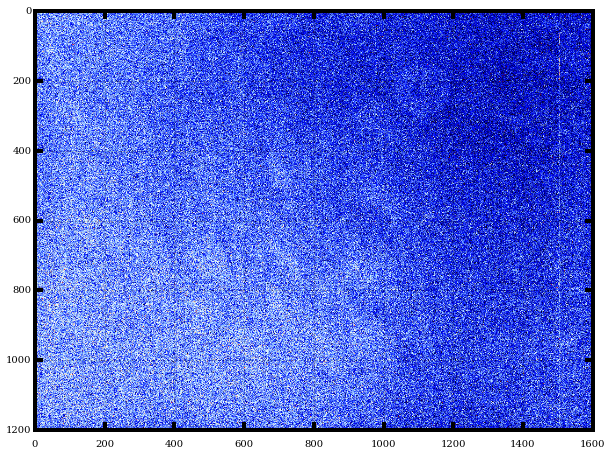

In [7]:
%matplotlib inline

def get_flat_files(which_corner='A', which_exp='10.0s'):
    return glob.glob("*flat_%s_%s*" % (which_corner, which_exp))

#Make list of files of observations of the A corner of projector screen using the 10-s integrations
A_files = get_flat_files(which_corner='A', which_exp='0.1s')
hdulist = fits.open(A_files[0])
fig = plt.figure(figsize = (10,10))
data = hdulist[0].data

#Using the flag colormap to enhance visibility of differences.
plt.imshow(data, cmap=cm.flag)

Show median images from each corner of the projector screen.

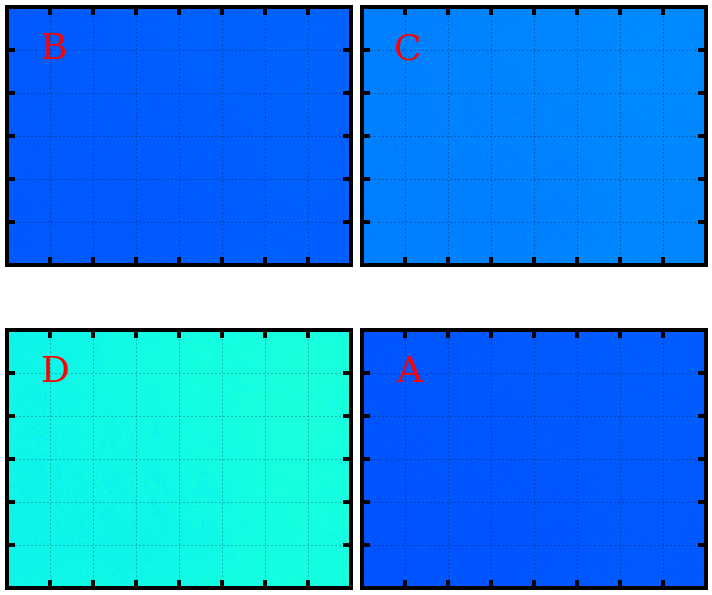

In [15]:
def med_flat_from_list(file_list):
    all_images = None
    for current_file in file_list:
        hdulist = fits.open(current_file)
    
        if(all_images is None):
            all_images = hdulist[0].data
        else:
            all_images = np.dstack((all_images, hdulist[0].data))
    return np.median(all_images, axis=2)

fig = plt.figure(figsize=(10, 10))
axes = list()
corner_list = ('A', 'B', 'C', 'D')
for i in range(len(corner_list)):
    file_list = get_flat_files(which_corner=corner_list[i], which_exp='0.1s')

    axes.append(fig.add_subplot(2,2,i))
    axes[i].xaxis.set_ticklabels([])
    axes[i].yaxis.set_ticklabels([])
    
    med_flat = med_flat_from_list(file_list)
    
    axes[i].imshow(med_flat, cmap=cm.flag)
    axes[i].text(0.1, 0.8, corner_list[i], transform=axes[i].transAxes, color='red', fontsize=36)
    
fig.tight_layout()
plt.show()

No obvious discrepancies between corners. Let's compare each corner's flats to a median image of all of them.

0.994167
0.995121
0.99402
0.993635


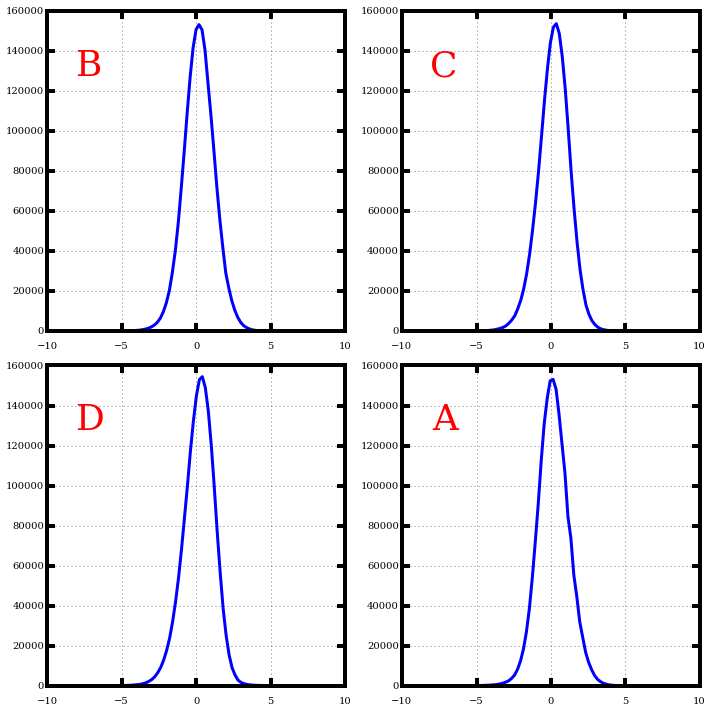

In [11]:
import statsmodels.robust.scale as sm

axes = list()
corner_list = ('A', 'B', 'C', 'D')
all_files = [get_flat_files(which_corner=corner_list[i], which_exp='3.0s') for i in range(len(corner_list))]
all_files = [item for temp in all_files for item in temp]
all_med_flat = med_flat_from_list(all_files)

fig = plt.figure(figsize=(10,10))
axes = list()
for i in range(len(corner_list)):
    flat_comparison = med_flat_from_list(get_flat_files(which_corner=corner_list[i]))/all_med_flat
    flat_comparison = np.ravel(flat_comparison)
    
    med = np.nanmean(flat_comparison)
    mad = sm.mad(flat_comparison)
    ind = abs(flat_comparison - med)/mad <= 10
    flat_comparison = (flat_comparison[ind] - med)/mad
    
    all_hst, all_bin_edges = np.histogram(flat_comparison, bins=100)
    print(sm.mad(flat_comparison))
    
    axes.append(fig.add_subplot(2,2,i))
    axes[i].plot(all_bin_edges[:-1], all_hst)
    axes[i].text(0.1, 0.8, corner_list[i], transform=axes[i].transAxes, color='red', fontsize=36)
    
fig.tight_layout()
plt.show()